In [68]:
from qiskit import *
from TOKEN import ACCESS_TOKEN
%matplotlib inline

In [69]:
# Input bit
bit1 = 1
bit2 = 0

Classical NOT Gate to Quantum NOT Gate

Classical

In [70]:
def classicalNOT(bit):
    assert bit in (0,1),"Only 0 or 1"
    return 1 + (-1)**bit

In [71]:
result = classicalNOT(bit1)
print(f"NOT {bit1} -> {result}")

NOT 1 -> 0


Quantum

In [72]:
def quantumNOT(bit, backend = 'sim', token = None):
    assert bit in (0,1),"Only 0 or 1"
    quantumBits = 1
    classicalBits = 1
    NOT = QuantumCircuit(quantumBits, classicalBits)

    if bit == 1:
        NOT.x(0)
    NOT.barrier()


    NOT.x(0)


    NOT.barrier()
    NOT.measure([0], [0])

    if backend == 'sim':
        sim = Aer.get_backend('qasm_simulator')
        result = execute(NOT, backend=sim, shots=1).result()

    elif backend == 'real':
        IBMQ.save_account(token)
        IBMQ.load_account()
        # execute on real quantum computer
        provider = IBMQ.get_provider('ibm-q')
        qcomp = provider.get_backend('ibmq_16_melbourne')
        job = execute(NOT, backend=qcomp)
        from qiskit.tools.monitor import job_monitor
        job_monitor(job) # get quantum computer queues
        result = job.result() # get result from real quantum computer

    counts = result.get_counts()
    return counts, NOT

configrc.store_credentials:WARNING:2021-01-03 21:34:49,913: Credentials already present. Set overwrite=True to overwrite.
C:\ProgramData\Anaconda3\envs\Qiskit\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-01-03 21:34:50,822: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


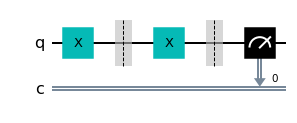

In [73]:
counts, qc = quantumNOT(bit1, backend='real', token = ACCESS_TOKEN)
qc.draw(output='mpl')

In [74]:
result = max(counts, key=counts.get)
print(f"NOT {bit1} -> {result}")


NOT 1 -> 0


Classical AND Gate to Quantum AND Gate

Classical

In [75]:
def classicalAND(bit1, bit2):
    assert bit1 in (0,1) and bit2 in (0,1),"Only 0 or 1"
    return bit1 * bit2

In [76]:
result = classicalAND(bit1, bit2)
print(f"AND ({bit1}, {bit2}) -> {result}")

AND (1, 0) -> 0


Quantum

In [77]:
def quantumAND(bit1, bit2, backend = 'sim', token = None):
    assert bit1 in (0,1) and bit2 in (0,1),"Only 0 or 1"
    quantumBits = 3
    classicalBits = 1
    AND = QuantumCircuit(quantumBits, classicalBits)

    if bit1 == 1:
        AND.x(0)
    if bit2 == 1:
        AND.x(1)
    AND.barrier()


    AND.ccx(0,1,2)


    AND.barrier()
    AND.measure([2], [0])

    if backend == 'sim':
        sim = Aer.get_backend('qasm_simulator')
        result = execute(AND, backend=sim, shots=1).result()

    elif backend == 'real':
        IBMQ.save_account(token)
        IBMQ.load_account()
        # execute on real quantum computer
        provider = IBMQ.get_provider('ibm-q')
        qcomp = provider.get_backend('ibmq_16_melbourne')
        job = execute(AND, backend=qcomp)
        from qiskit.tools.monitor import job_monitor
        job_monitor(job) # get quantum computer queues
        result = job.result() # get result from real quantum computer

    counts = result.get_counts()
    return counts, AND

configrc.store_credentials:WARNING:2021-01-03 21:36:12,291: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-01-03 21:36:13,255: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


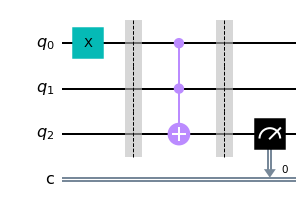

In [78]:
counts, qc = quantumAND(bit1, bit2, backend='real', token = ACCESS_TOKEN)
qc.draw(output='mpl')

In [79]:
result = max(counts, key=counts.get)
print(f"AND ({bit1}, {bit2}) -> {result}")

AND (1, 0) -> 0


Classical OR Gate to Quantum OR Gate

Classical

In [80]:
def classicalOR(bit1, bit2):
    assert bit1 in (0,1) and bit2 in (0,1),"Only 0 or 1"
    return (bit1 + bit2) % 2

In [81]:
result = classicalOR(bit1, bit2)
print(f"OR ({bit1}, {bit2}) -> {result}")

OR (1, 0) -> 1


Quantum

In [82]:
def quantumOR(bit1, bit2, backend = 'sim', token = None):
    assert bit1 in (0,1) and bit2 in (0,1),"Only 0 or 1"
    quantumBits = 3
    classicalBits = 1
    OR = QuantumCircuit(quantumBits, classicalBits)

    if bit1 == 1:
        OR.x(0)
    if bit2 == 1:
        OR.x(1)
    OR.barrier()


    OR.x(0)
    OR.x(1)
    OR.x(2)
    OR.ccx(0,1,2)
    OR.x(0)
    OR.x(1)


    OR.barrier()
    OR.measure([2], [0])

    if backend == 'sim':
        sim = Aer.get_backend('qasm_simulator')
        result = execute(OR, backend=sim, shots=1).result()

    elif backend == 'real':
        IBMQ.save_account(token)
        IBMQ.load_account()
        # execute on real quantum computer
        provider = IBMQ.get_provider('ibm-q')
        qcomp = provider.get_backend('ibmq_16_melbourne')
        job = execute(OR, backend=qcomp)
        from qiskit.tools.monitor import job_monitor
        job_monitor(job) # get quantum computer queues
        result = job.result() # get result from real quantum computer

    counts = result.get_counts()
    return counts, OR

configrc.store_credentials:WARNING:2021-01-03 21:38:32,985: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-01-03 21:38:33,850: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


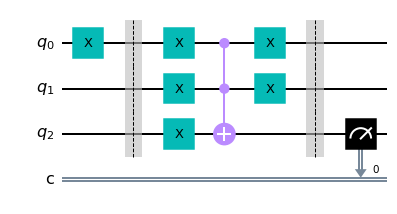

In [83]:
counts, qc = quantumOR(bit1, bit2, backend='real', token = ACCESS_TOKEN)
qc.draw(output='mpl')

In [84]:
result = max(counts, key=counts.get)
print(f"OR ({bit1}, {bit2}) -> {result}")

OR (1, 0) -> 1


Classical XOR Gate to Quantum XOR Gate

Classical

In [85]:
def classicalXOR(bit1, bit2):
    assert bit1 in (0,1) and bit2 in (0,1),"Only 0 or 1"
    return int(bit1 != bit2)

In [86]:
result = classicalXOR(bit1, bit2)
print(f"XOR ({bit1}, {bit2}) -> {result}")

XOR (1, 0) -> 1


Quantum

In [87]:
def quantumXOR(bit1, bit2, backend = 'sim', token = None):
    assert bit1 in (0,1) and bit2 in (0,1),"Only 0 or 1"
    quantumBits = 2
    classicalBits = 1
    XOR = QuantumCircuit(quantumBits, classicalBits)

    if bit1 == 1:
        XOR.x(0)
    if bit2 == 1:
        XOR.x(1)
    XOR.barrier()


    XOR.cx(0,1)


    XOR.barrier()
    XOR.measure([1], [0])

    if backend == 'sim':
        sim = Aer.get_backend('qasm_simulator')
        result = execute(XOR, backend=sim, shots=1).result()

    elif backend == 'real':
        IBMQ.save_account(token)
        IBMQ.load_account()
        # execute on real quantum computer
        provider = IBMQ.get_provider('ibm-q')
        qcomp = provider.get_backend('ibmq_16_melbourne')
        job = execute(XOR, backend=qcomp)
        from qiskit.tools.monitor import job_monitor
        job_monitor(job) # get quantum computer queues
        result = job.result() # get result from real quantum computer

    counts = result.get_counts()
    return counts, XOR

configrc.store_credentials:WARNING:2021-01-03 21:40:46,999: Credentials already present. Set overwrite=True to overwrite.
C:\ProgramData\Anaconda3\envs\Qiskit\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-01-03 21:40:51,275: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


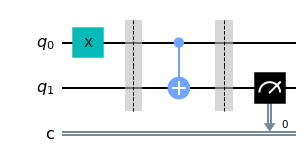

In [90]:
counts, qc = quantumXOR(bit1, bit2, backend='real', token = ACCESS_TOKEN)
qc.draw(output='mpl')

In [91]:
result = max(counts, key=counts.get)
print(f"XOR ({bit1}, {bit2}) -> {result}")

XOR (1, 0) -> 1
